# 数据结构和序列

## 元组
元组是⼀个固定⻓度，不可改变的Python序列对象。创建元组的
最简单⽅式，是⽤逗号分隔⼀列值：

In [23]:
tup = 4, 5, 6
tup

(4, 5, 6)

当⽤复杂的表达式定义元组，最好将值放到圆括号内，如下所
示：

In [24]:
nested_tup = (4, 5, 6), (7, 8)
nested_tup

((4, 5, 6), (7, 8))

⽤tuple可以将任意序列或迭代器转换成元组：

In [25]:
tuple([4, 0, 2])

(4, 0, 2)

In [26]:
tup = tuple('string')
tup

('s', 't', 'r', 'i', 'n', 'g')

可以⽤⽅括号访问元组中的元素。和C、C++、JAVA等语⾔⼀
样，序列是从0开始的：

In [27]:
tup[0]

's'

元组中存储的对象可能是可变对象。

⼀旦创建了元组，元组中的
对象就不能修改了：

In [28]:
# tup = tuple(['foo', [1,2], True])
# tup[2] = False

如果元组中的某个对象是可变的，⽐如列表，可以在原位进⾏修
改：

In [29]:
tup = tuple(['foo', [1,2], True])
tup[1].append(3)
tup

('foo', [1, 2, 3], True)

可以⽤加号运算符将元组串联起来：

In [30]:
(4, None, 'foo') + (6, 0) + ('bar', )

(4, None, 'foo', 6, 0, 'bar')

元组乘以⼀个整数，像列表⼀样，会将⼏个元组的复制串联起
来：

In [31]:
('foo', 'bar') * 4

('foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar')

对象本身并没有被复制，只是引⽤了它

### 拆分元组
如果你想将元组赋值给类似元组的变量，Python会试图拆分等号
右边的值

In [32]:
tup = (4, 5, 6)
a, b, c = tup

print(a)
print(b)
print(c)

4
5
6


即使含有元组的元组也会被拆分：

In [33]:
tup = 4, 5, (6,7)
a,b,(c,d) = tup
d

7

使⽤这个功能，你可以很容易地替换变量的名字，其它语⾔可能
是这样：
```c
    temp = a
    a = b
    b = temp
```
但是在Python中，替换可以这样做：

In [34]:
a,b = 1,2

print(a)
print(b)

1
2


In [35]:
b, a = a, b

print(a)
print(b)

2
1


变量拆分常⽤来迭代元组或列表序列：

In [36]:
seq = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
for a, b,c in seq:
    print('a={0}, b={1}, c={2}'.format(a,b,c))

a=1, b=2, c=3
a=4, b=5, c=6
a=7, b=8, c=9


另⼀个常⻅⽤法是从函数返回多个值。后⾯会详解。

Python最近新增了更多⾼级的元组拆分功能，允许从元组的开
头“摘取”⼏个元素。它使⽤了特殊的语法*rest，这也⽤在函数
签名中以抓取任意⻓度列表的位置参数：

In [37]:
values = 1, 2, 3, 4, 5
a, b, *rest = values

a, b

(1, 2)

In [38]:
rest

[3, 4, 5]

rest的部分是想要舍弃的部分，rest的名字不重要

作为惯⽤写
法，许多Python程序员会将不需要的变量使⽤下划线：

In [39]:
a, b, *_ = values

a, b

(1, 2)

In [40]:
_

[3, 4, 5]

## tuple⽅法
因为元组的⼤⼩和内容不能修改，它的实例⽅法都很轻量。其中
⼀个很有⽤的就是count（也适⽤于列表），它可以统计某个值
得出现频率：

In [41]:
a = (1, 2, 2, 2, 3, 4, 2)
a.count(2)

4

## 列表
与元组对⽐，列表的⻓度可变、内容可以被修改。你可以⽤⽅括
号定义，或⽤list函数：

In [42]:
a_list = [2, 3, 7, None]
tup = ('foo', 'bar', 'baz')
b_list = list(tup)

b_list

['foo', 'bar', 'baz']

In [43]:
b_list[1] = "peekboo"
b_list

['foo', 'peekboo', 'baz']

列表和元组的语义接近，在许多函数中可以交叉使⽤。

list函数常⽤来在数据处理中实体化迭代器或⽣成器

In [44]:
gen = range(10)
gen

range(0, 10)

In [45]:
list(gen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 添加和删除元素
可以⽤append在列表末尾添加元素：

In [46]:
b_list.append('dwarf')
b_list

['foo', 'peekboo', 'baz', 'dwarf']

insert可以在特定的位置插⼊元素：

In [47]:
b_list.insert(1,'red')
b_list

['foo', 'red', 'peekboo', 'baz', 'dwarf']

插⼊的序号必须在0和列表⻓度之间。

警告：与append相⽐，insert耗费的计算量⼤，因为对后续要在序列的头部和尾部插⼊元素，你可能需要使⽤collections.deque，⼀个双尾部队列。


insert的逆运算是pop，它移除并返回指定位置的元素：

In [48]:
b_list.pop(2)

'peekboo'

In [49]:
b_list

['foo', 'red', 'baz', 'dwarf']

可以⽤remove去除某个值，remove会先寻找第⼀个值并除去：

In [50]:
b_list.append('foo')
b_list

['foo', 'red', 'baz', 'dwarf', 'foo']

In [51]:
b_list.remove('foo')
b_list

['red', 'baz', 'dwarf', 'foo']

如果不考虑性能，使⽤append和remove，可以把Python的列表
当做完美的“多重集”数据结构。

⽤in可以检查列表是否包含某个值：

In [52]:
'dwarf' in b_list

True

在列表中检查是否存在某个值远比字典和集合速度慢，因为
Python是线性搜索列表中的值，

但在字典和集合中，在同样的时间内还可以检查其它项(基于哈希表)

### 串联和组合列表
与元组类似，可以⽤加号将两个列表串联起来：

In [53]:
[4, None, 'foo'] + [7, 8, (2, 3)]

[4, None, 'foo', 7, 8, (2, 3)]

如果已经定义了⼀个列表，⽤extend⽅法可以追加多个元素：

In [54]:
x = [4, None, 'foo']
x.extend([7,8,(2,3)])
x

[4, None, 'foo', 7, 8, (2, 3)]

通过加法将列表串联的计算量较⼤，因为要新建⼀个列表，并且
要复制对象。⽤extend追加元素，尤其是到⼀个⼤列表中，更为
可取。因此：

In [55]:
list_of_lists = [[1,2], [3,4],[5,6]]
everything = []
for chunk in list_of_lists:
    everything.extend(chunk)
everything

[1, 2, 3, 4, 5, 6]

### 排序
你可以用sort函数将一个列表原地排序(不创建新的对象)

In [56]:
a = [7,2,5,1,3]
a.sort()
a

[1, 2, 3, 5, 7]

sort有⼀些选项，有时会很好⽤。其中之⼀是⼆级排序key，可
以⽤这个key进⾏排序。例如，我们可以按⻓度对字符串进⾏排
序：

In [57]:
b = ['saw', 'small', 'He', 'foxes', 'six']
b.sort(key=len)
b

['He', 'saw', 'six', 'small', 'foxes']

### ⼆分搜索和维护已排序的列表
bisect模块⽀持⼆分查找，和向已排序的列表插⼊值。

**bisect.bisect**可以找到插⼊值后仍保证排序的位置

它的作用是：

> **告诉你：如果我要把某个数插入到这个已排序的列表里，应该插在哪个位置（索引），才能保证列表依然有序？**

注意：它**不实际插入**，只是告诉你“该插在哪”。



bisect.insort是向这个位置插⼊值：

In [58]:
import bisect
c = [1,2,2,2,3,4,7]
bisect.bisect(c,2)

4

In [59]:
bisect.bisect(c,5)

6

In [60]:
c

[1, 2, 2, 2, 3, 4, 7]

In [61]:
bisect.insort(c, 6)
c

[1, 2, 2, 2, 3, 4, 6, 7]

注意：bisect模块不会检查列表是否已排好序，进⾏检查的
话会耗费⼤量计算。


因此，对未排序的列表使⽤bisect不会
产⽣错误，但结果不⼀定正确。

## 切片
⽤切边可以选取⼤多数序列类型的⼀部分，切⽚的基本形式是在
⽅括号中使⽤start:stop

In [62]:
 seq = [7, 2, 3, 7, 5, 6, 0, 1] 
 seq[1:5]

[2, 3, 7, 5]

切⽚也可以被序列赋值：


In [63]:
seq[3:4] = [6, 3]
seq

[7, 2, 3, 6, 3, 5, 6, 0, 1]

切⽚的起始元素是包括的，不包含结束元素。因此，结果中包含
的元素个数是stop - start。

start或stop都可以被省略，省略之后，分别默认序列的开头和
结尾：

In [64]:
seq[ :5]

[7, 2, 3, 6, 3]

In [65]:
seq[3:]

[6, 3, 5, 6, 0, 1]

负数表明从后向前切⽚：

In [66]:
seq[-4: ]

[5, 6, 0, 1]

In [67]:
seq[-6:-2]

[6, 3, 5, 6]

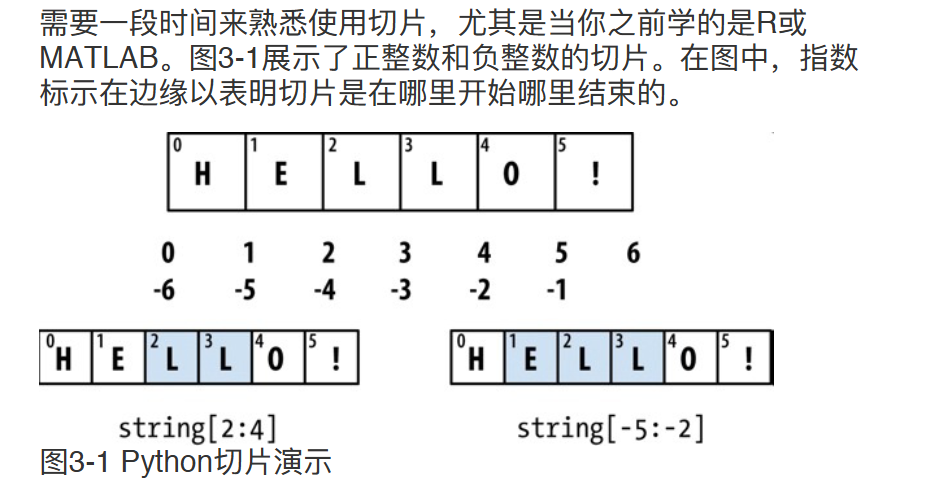

# 序列函数

## enumerate函数

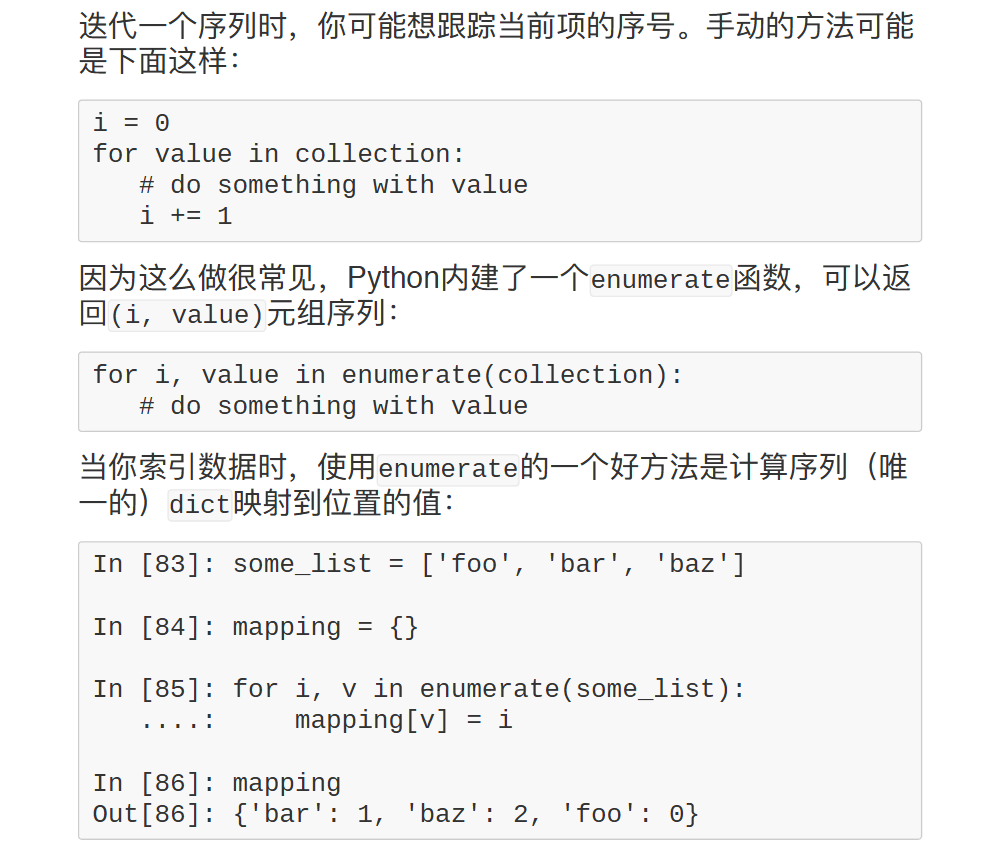


## sorted 函数
sorted函数可以从任意序列的元素返回⼀个新的排好序的列表：

In [68]:
sorted([7,1,2,6,0,3,2])

[0, 1, 2, 2, 3, 6, 7]

In [69]:
sorted('horse race')

[' ', 'a', 'c', 'e', 'e', 'h', 'o', 'r', 'r', 's']

## zip函数
zip可以将多个列表、元组或其它序列成对组合成⼀个元组列
表：

In [70]:
seq1 = ['foo', 'bar', 'baz']
seq2 = ['one', 'two', 'three']
zipped = zip(seq1, seq2)
list(zipped)

[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]

zip可以处理任意多的序列，元素的个数取决于最短的序列：

In [71]:
seq3 = [False, True]
list(zip(seq1, seq2, seq3))

[('foo', 'one', False), ('bar', 'two', True)]

In [72]:
for i, (a, b) in enumerate(zip(seq1, seq2)):
    print('{0}: {1}, {2}'.format(i, a, b))

0: foo, one
1: bar, two
2: baz, three


给出⼀个“被压缩的”序列，zip可以被⽤来解压序列。也可以当
作把⾏的列表转换为列的列表。这个⽅法看起来有点神奇：

In [73]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'),('Schilling', 'Curt')]

first_names, last_names = zip(*pitchers)

In [74]:
first_names

('Nolan', 'Roger', 'Schilling')

In [75]:
last_names

('Ryan', 'Clemens', 'Curt')

## reversed函数
reversed可以从后向前迭代⼀个序列：

In [76]:
list(reversed(range(10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## 字典
字典可能是Python最为重要的数据结构。它更为常⻅的名字是哈
希映射或关联数组。它是键值对的⼤⼩可变集合，键和值都是
Python对象。创建字典的⽅法之⼀是使⽤尖括号，⽤冒号分隔键
和值：

In [77]:
empty_dict = {}
d1 = {'a':'some value', 'b' : [1,2,3,4]}
d1

{'a': 'some value', 'b': [1, 2, 3, 4]}

你可以像访问列表或元组中的元素⼀样，访问、插⼊或设定字典
中的元素：

In [78]:
d1[7] = 'an integer'
d1

{'a': 'some value', 'b': [1, 2, 3, 4], 7: 'an integer'}

In [79]:
d1['b']

[1, 2, 3, 4]

你可以⽤检查列表和元组是否包含某个值得⽅法，检查字典中是
否包含某个键：

In [80]:
'b' in d1

True

可以⽤del关键字或pop⽅法（返回值得同时删除键）删除值：

In [81]:
d1[5] = 'some value'
d1

{'a': 'some value', 'b': [1, 2, 3, 4], 7: 'an integer', 5: 'some value'}

In [82]:
d1['dummy'] = 'another value'
d1

{'a': 'some value',
 'b': [1, 2, 3, 4],
 7: 'an integer',
 5: 'some value',
 'dummy': 'another value'}

In [83]:
del d1[5]
d1

{'a': 'some value',
 'b': [1, 2, 3, 4],
 7: 'an integer',
 'dummy': 'another value'}

In [84]:
ret = d1.pop('dummy')
ret

'another value'

In [86]:
d1

{'a': 'some value', 'b': [1, 2, 3, 4], 7: 'an integer'}

keys和values是字典的键和值的迭代器⽅法。虽然键值对没有
顺序，这两个⽅法可以⽤相同的顺序输出键和值

In [88]:
list(d1.keys())

['a', 'b', 7]

In [89]:
list(d1.values())

['some value', [1, 2, 3, 4], 'an integer']

⽤update⽅法可以将⼀个字典与另⼀个融合：

In [92]:
d1.update({'b': 'foo', 'c':12})
d1

{'a': 'some value', 'b': 'foo', 7: 'an integer', 'c': 12}

update⽅法是原地改变字典，因此任何传递给update的键的旧
的值都会被舍弃

## 用序列创建字典
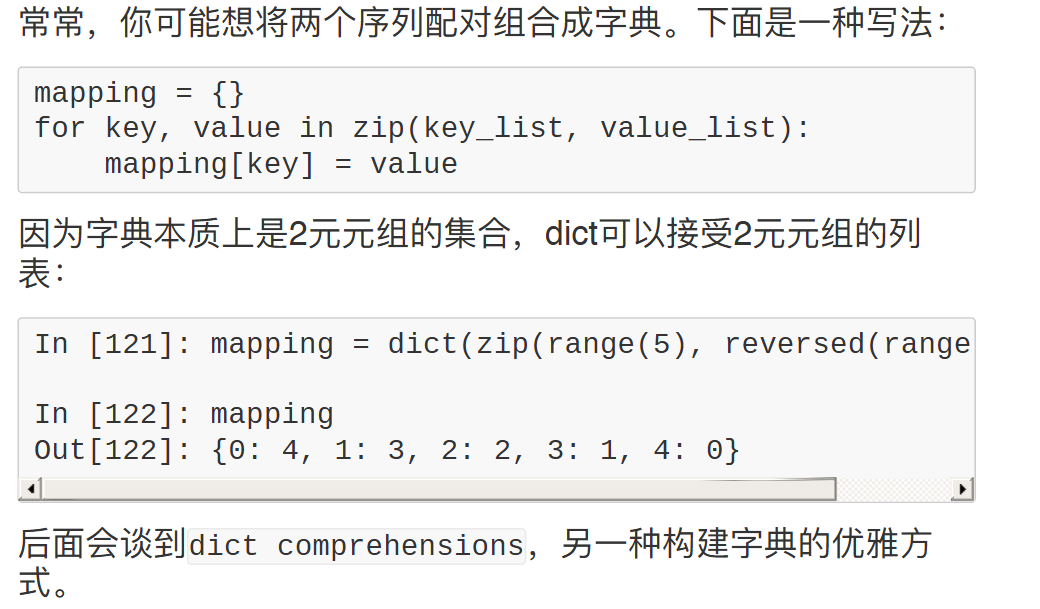

## 默认值

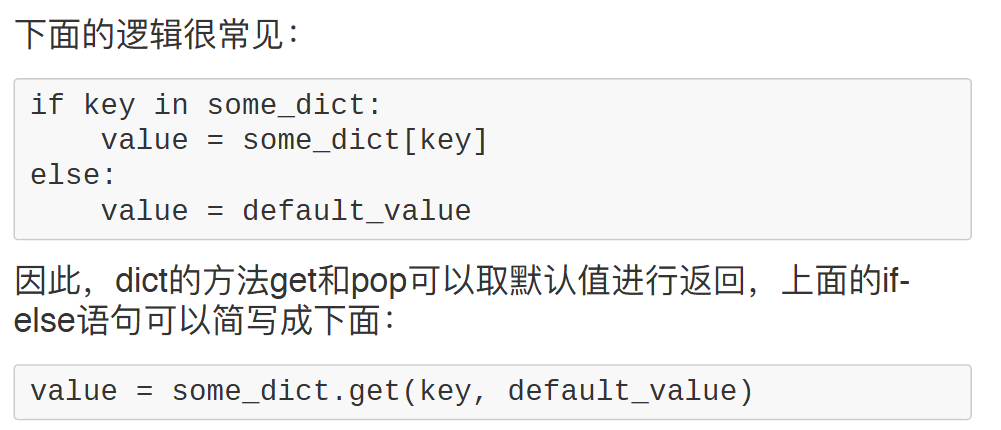

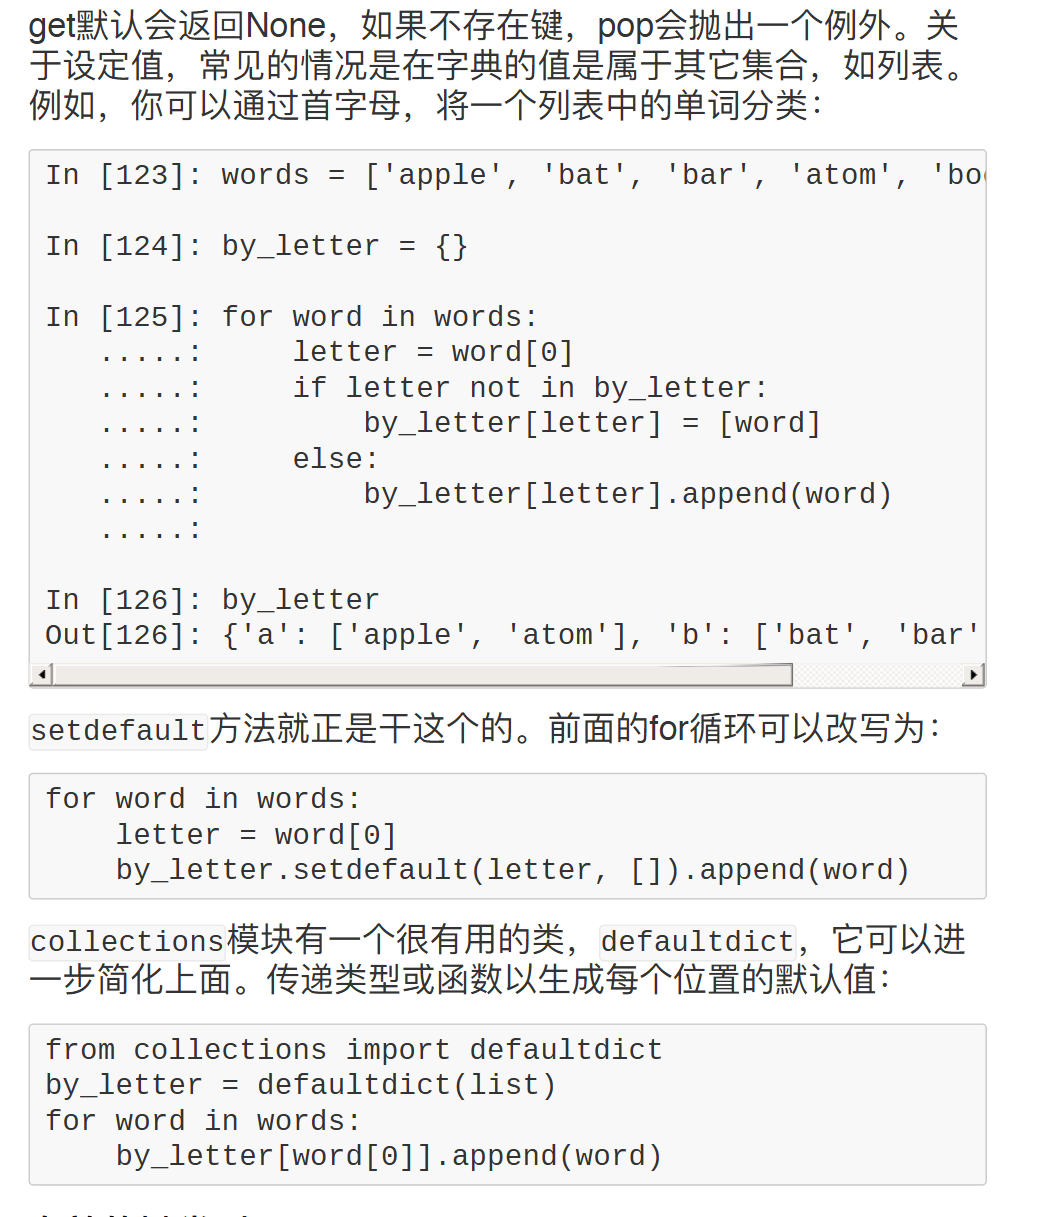
